In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sarimax_results = pd.read_csv('/Users/jinny/Documents/touristcast/SARIMAX/SARIMAX_error_crossval.csv', index_col=0)

In [3]:
sarimax_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 6 columns):
region       65 non-null object
periods      65 non-null int64
MAE          65 non-null float64
RMSE         65 non-null float64
Max_error    65 non-null float64
MASE         65 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


### Lowest MASE by region


In [4]:
for reg, group in sarimax_results.groupby('region'):
    print(group.loc[group.MASE.idxmin()])

region             ARA
periods              3
MAE            63.0604
RMSE           78.2817
Max_error    0.0736609
MASE          0.887967
Name: 16, dtype: object
region             BFC
periods              5
MAE            25.1154
RMSE           29.3205
Max_error    0.0599987
MASE          0.875508
Name: 48, dtype: object
region             BRE
periods              3
MAE            30.0477
RMSE           38.0839
Max_error    0.0866028
MASE           1.05381
Name: 31, dtype: object
region             COR
periods              6
MAE            14.3423
RMSE           20.7009
Max_error    0.0675206
MASE           1.21605
Name: 44, dtype: object
region             CVL
periods              4
MAE            13.3894
RMSE           16.0274
Max_error    0.0395786
MASE          0.733096
Name: 2, dtype: object
region             GES
periods              4
MAE            31.9623
RMSE           40.4219
Max_error    0.0468914
MASE          0.843036
Name: 52, dtype: object
region            HDF
periods

In [5]:
sarimax_results.loc[sarimax_results.MASE.idxmin()]

region            HDF
periods             5
MAE           11.6115
RMSE          16.1092
Max_error     0.03762
MASE         0.504171
Name: 58, dtype: object

In [6]:
sarimax_results.loc[sarimax_results.MASE.idxmax()]

region            PAC
periods             2
MAE           250.047
RMSE           264.48
Max_error    0.110451
MASE          5.36898
Name: 20, dtype: object

### RMSE curves

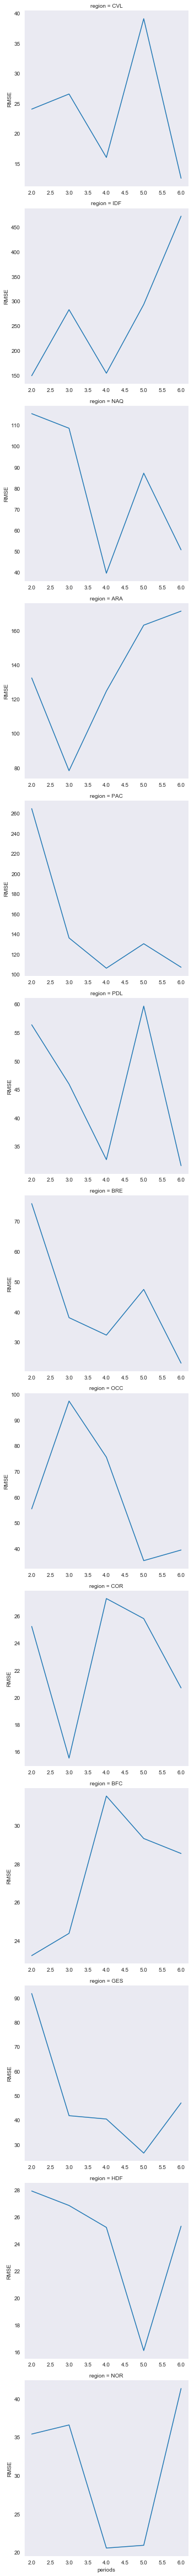

In [8]:
sns.set_style("dark")

sns.relplot(x='periods', y='RMSE',
            row='region',
            kind='line', legend='full',
            data=sarimax_results,
            facet_kws={'sharex': False, 'sharey': False});

### MASE curves

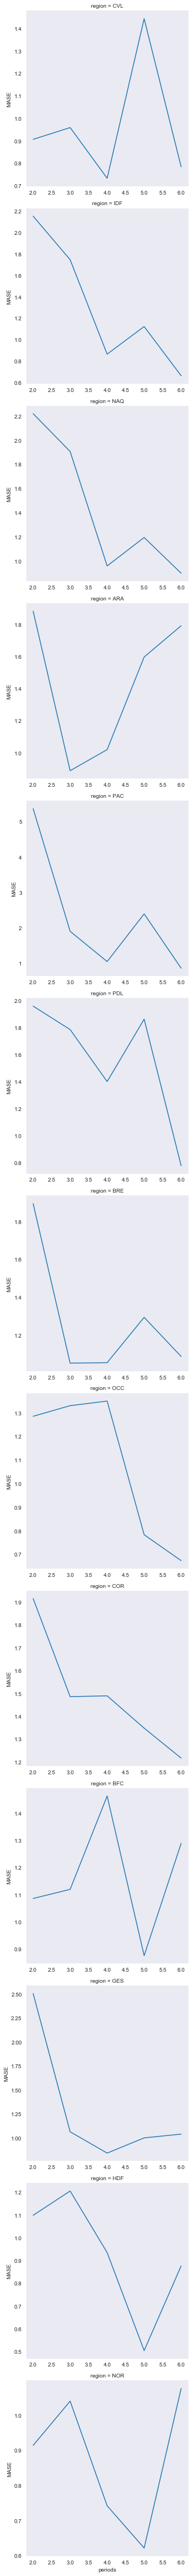

In [9]:
sns.relplot(x='periods', y='MASE',
            row='region',
            kind='line', legend='full',
            data=sarimax_results,
            facet_kws={'sharex': False, 'sharey': False});

### Precise error measures for periods = 6

In [12]:
sarimax_results[(sarimax_results.periods==6)]

,region,periods,MAE,RMSE,Max_error,MASE
4,CVL,6,10.338523,12.563125,0.037208,0.783964
9,IDF,6,375.625724,472.244186,0.166889,0.662945
14,NAQ,6,38.707675,50.596005,0.048897,0.899481
19,ARA,6,159.617907,171.255204,0.111564,1.791547
24,PAC,6,80.730599,106.821546,0.083101,0.848880
29,PDL,6,27.484111,31.597184,0.074135,0.777687
34,BRE,6,19.633227,23.051669,0.047200,1.089021
39,OCC,6,33.442491,39.391187,0.037213,0.673407
44,COR,6,14.342276,20.700874,0.067521,1.216048
49,BFC,6,23.469633,28.539332,0.062783,1.288832


In [15]:
(100 * sarimax_results.Max_error[(sarimax_results.periods==6)]).round(2).astype(str) + '%'

4      3.72%
9     16.69%
14     4.89%
19    11.16%
24     8.31%
29     7.41%
34     4.72%
39     3.72%
44     6.75%
49     6.28%
54     6.01%
59     4.81%
64     8.91%
Name: Max_error, dtype: object